# Clubes de Ciencia México 2021
## 13,800 millones de años de viaje, la historia de nuestro universo

*Instructores:* 

Jose María Ezquiaga (University of Chicago, ezquiaga@uchicago.edu)

Miriam Gudino (UNAM, miriamegy@gmail.com)

Gabriel Missael Barco (TA, Universidad de Guanajuato, missaelgabo@gmail.com)

---

#### Actividad 3: Ondas gravitacionales 

En la cuarta clase del club de ciencia hemos aprendido sobre las ondas gravitacionales y toda la información nueva que nos pueden aportar sobre nuestro universo. En esta actividad vamos a explorar como la frecuencia de las ondas gravitacionales depende de la masa.

<img src='https://upload.wikimedia.org/wikipedia/commons/a/af/Gravitational-wave_detector_sensitivities_and_astrophysical_gravitational-wave_sources.png' alt='Alt text' title='Title text' />


Utilizaremos los siguientes paquetes de python

In [1]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt

Para hacer los plots más bonitos

In [2]:
%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fontSz = 17
fontsz = 15
fontssz = 13

La frequencia de una onda gravitacional depende del momento de la orbita y de las masas de los objetos que van a colisionar

\begin{equation}
f(t)=\frac{1}{8\pi t_{M_c}}\left(\frac{5t_{M_c}}{t}\right)^{3/8}
\end{equation}

donde hemos definido

\begin{equation}
t_M = \frac{2GM}{c^3}
\end{equation}

con $G$ la constante de Newton, $c$ la velocidad de la luz y $M_c$ es la chirp mass

\begin{equation}
M_c = \frac{(m_1m_2)^{3/5}}{(m_1+m_2)^{1/5}}
\end{equation}

In [3]:
TSUN    = 4.92549232189886339689643862e-6 # mass of sun in seconds (G=C=1)

def f_ini(tmerge,M): 
    #tmerge in sec
    #M in Msun in *detector* frame
    tM = M*TSUN
    return (1./(8.*np.pi*tM))*(5.*tM/(tmerge))**(3./8.) #Hz

def mchirp(m1,m2):
    return np.power(m1*m2,3./5.)/np.power(m1+m2,1./5.)

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


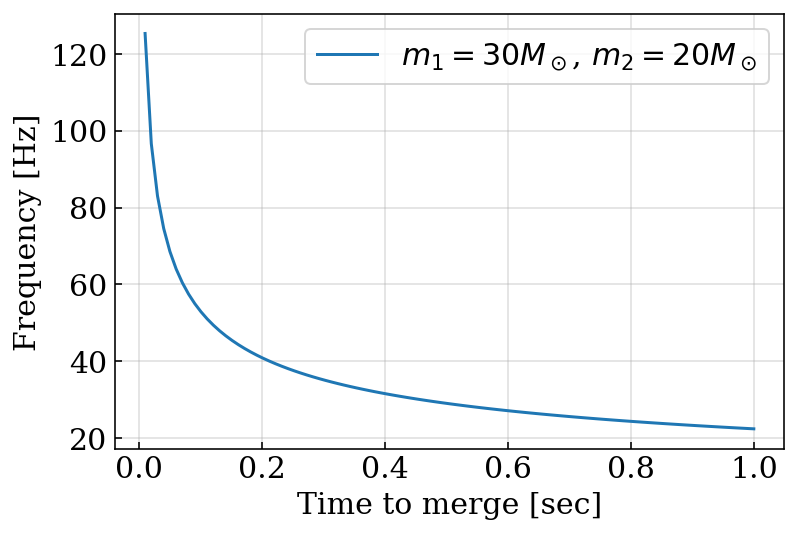

In [6]:
mass1 = 30
mass2 = 20
Mchirp = mchirp(mass1,mass2)

times = np.linspace(1,0,100)
freqs = f_ini(times,Mchirp)

plt.plot(times,freqs,label = r'$m_1=%s M_\odot$, $m_2=%s M_\odot$' % (mass1,mass2))
plt.xlabel('Time to merge [sec]',fontsize=fontsz)
plt.ylabel('Frequency [Hz]',fontsize=fontsz)
plt.legend(fontsize=fontsz,loc='upper right')
plt.grid(alpha=0.4)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
plt.show()

# Obtener las masas de la binaria de los datos

En el fichero data.txt podéis encontrar los datos de tiempo y frecuencia para una simulación de ondas gravitacionales.

El objetivo es determinar cúal es la masa de las componentes de la binaria.

Leemos los datos

In [ ]:
# COMENTAR ESTE BLOQUE SI NO LO CORRES CON COLAB
import requests
import base64

url = 'https://api.github.com/repos/ezquiaga/cdecmx21_explorando_universo/contents/data.txt'
req = requests.get(url)
if req.status_code == requests.codes.ok:
    req = req.json()
    data = base64.decodestring(req['content'])
else:
    print('Content was not found.')

with open("data.txt", "w") as text_file:
    text_file.write(data)

In [7]:
data = np.genfromtxt('data.txt')
times_data = data[:,0]
freqs_data = data[:,1]

print('Numero de datos = ',len(freqs_data))

('Numero de datos = ', 30)


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


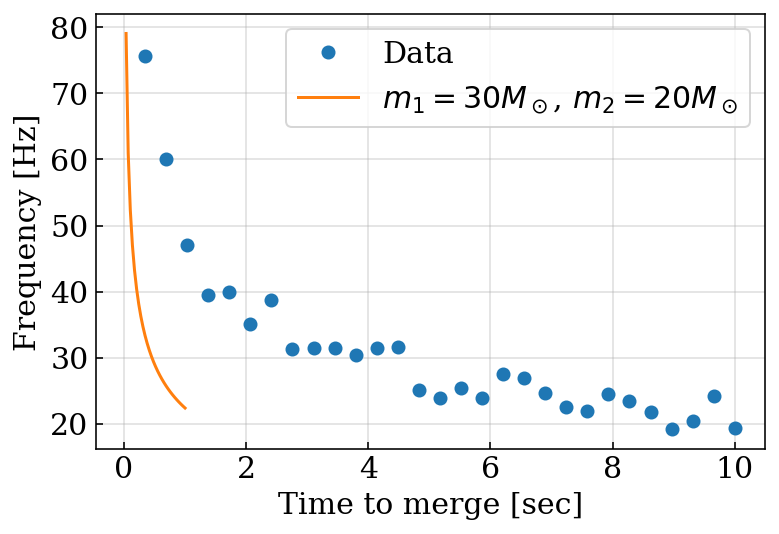

In [8]:
mass1 = 30 #Podeis cambair las masas
mass2 = 20
Mchirp = mchirp(mass1,mass2)

times = np.linspace(1,0,30) #Podeis cambiar el rango de tiempos
freqs = f_ini(times,Mchirp)

plt.plot(times_data,freqs_data,'o',label = r'Data')
plt.plot(times,freqs,label = r'$m_1=%s M_\odot$, $m_2=%s M_\odot$' % (mass1,mass2))
plt.xlabel('Time to merge [sec]',fontsize=fontsz)
plt.ylabel('Frequency [Hz]',fontsize=fontsz)
plt.legend(fontsize=fontsz,loc='upper right')
plt.grid(alpha=0.4)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
plt.show()

---

## Cosmology in python? 

Use [astropy](https://docs.astropy.org/en/stable/cosmology/index.html)!!

---

## How can you learn more about GWs?

The [GW-Open Science center](https://www.gw-openscience.org/about/) has a lot of great resources, including tutorials that will let you [discovery GWs on your own](https://www.gw-openscience.org/GW150914data/GW150914_tutorial.html).